<a href="https://colab.research.google.com/github/aadyakoirala/analytics-projects/blob/main/Final_Project_Sales_Analysis__Rush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Notebook Structure: Sales Analysis for RUSH

## Import Libraries

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Date Handling
from datetime import datetime
# Improve plot aesthetics
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Load and Inspect Data

## Upload CSV Files to Colab

In [ ]:
# Upload TABLE_PRODUCTS_885 CSV files from local machine
from google.colab import files
uploaded = files.upload()



Saving TABLE_PRODUCTS_885.csv to TABLE_PRODUCTS_885 (1).csv


In [ ]:
# Upload TABLE_RETAILER_885 CSV files from local machine
from google.colab import files
uploaded = files.upload()

Saving TABLE_RETAILER_885.csv to TABLE_RETAILER_885 (1).csv


In [ ]:
# Upload TABLE_SALES_885 CSV files from local machine
from google.colab import files
uploaded = files.upload()

Saving TABLE_SALES_885.csv to TABLE_SALES_885 (1).csv


In [ ]:
# pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format','{:.2f}'. format)


## Read the CSV Files into DataFrames

In [ ]:
import pandas as pd
## Load the CSV into a DataFrame
products_df = pd.read_csv('TABLE_PRODUCTS_885.csv',delimiter='|')
retailers_df = pd.read_csv('TABLE_RETAILER_885.csv', delimiter=',')
sales_df = pd.read_csv('TABLE_SALES_885.csv', delimiter=',')

## Preview the Data

In [ ]:
# Preview products data
products_df.head()

,PRODUCT_ID,PRODUCT_NAME
0,20,Men's Street Footwear
1,30,Men's Athletic Footwear
2,120,Women's Street Footwear
3,130,Women's Athletic Footwear
4,40,Men's Apparel


In [ ]:
# preview retailers data
retailers_df.head()

,RETAILER_ID,RETAILER,REGION,STATE,CITY
0,A00MOHCO,Amazon,Midwest,Ohio,Columbus
1,A00NMAPO,Amazon,Northeast,Maine,Portland
2,A00NMABO,Amazon,Northeast,Massachusetts,Boston
3,A00NNEMA,Amazon,Northeast,New Hampshire,Manchester
4,A00NVEBU,Amazon,Northeast,Vermont,Burlington


In [ ]:
# Preview sales data
sales_df.head()

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD
0,1,A00MOHCO,1/1/2020,1,1,2020,20,50.00,1200,0.50,In-store
1,7,A00MOHCO,1/7/2020,1,7,2020,20,50.00,1250,0.50,In-store
2,13,A00MOHCO,1/25/2020,1,25,2020,20,50.00,1220,0.50,Outlet
3,19,A00MOHCO,1/31/2020,1,31,2020,20,50.00,1200,0.50,Outlet
4,25,A00MOHCO,2/6/2020,2,6,2020,20,60.00,1220,0.50,Outlet


## Consolidate dataframes

## Merge SALES with PRODUCT on PRODUCT_ID

In [ ]:
sales_product_df = sales_df.merge(products_df, on='PRODUCT_ID', how='left')
# Check my work
sales_product_df.head()


,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME
0,1,A00MOHCO,1/1/2020,1,1,2020,20,50.00,1200,0.50,In-store,Men's Street Footwear
1,7,A00MOHCO,1/7/2020,1,7,2020,20,50.00,1250,0.50,In-store,Men's Street Footwear
2,13,A00MOHCO,1/25/2020,1,25,2020,20,50.00,1220,0.50,Outlet,Men's Street Footwear
3,19,A00MOHCO,1/31/2020,1,31,2020,20,50.00,1200,0.50,Outlet,Men's Street Footwear
4,25,A00MOHCO,2/6/2020,2,6,2020,20,60.00,1220,0.50,Outlet,Men's Street Footwear


## Merge result with RETAILER on RETAILER_ID

In [ ]:
consolidated_df = sales_product_df.merge(retailers_df, on='RETAILER_ID', how='left')
# Check my work
consolidated_df.head()



,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
0,1,A00MOHCO,1/1/2020,1,1,2020,20,50.00,1200,0.50,In-store,Men's Street Footwear,Amazon,Midwest,Ohio,Columbus
1,7,A00MOHCO,1/7/2020,1,7,2020,20,50.00,1250,0.50,In-store,Men's Street Footwear,Amazon,Midwest,Ohio,Columbus
2,13,A00MOHCO,1/25/2020,1,25,2020,20,50.00,1220,0.50,Outlet,Men's Street Footwear,Amazon,Midwest,Ohio,Columbus
3,19,A00MOHCO,1/31/2020,1,31,2020,20,50.00,1200,0.50,Outlet,Men's Street Footwear,Amazon,Midwest,Ohio,Columbus
4,25,A00MOHCO,2/6/2020,2,6,2020,20,60.00,1220,0.50,Outlet,Men's Street Footwear,Amazon,Midwest,Ohio,Columbus


## Inspect Data Characteristics

In [ ]:
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10271 entries, 0 to 10270
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDER_ID          10271 non-null  int64  
 1   RETAILER_ID       10271 non-null  object 
 2   INVOICE_DATE      10271 non-null  object 
 3   MONTH             10271 non-null  int64  
 4   DAY               10271 non-null  int64  
 5   YEAR              10271 non-null  int64  
 6   PRODUCT_ID        10271 non-null  int64  
 7   PRICE_PER_UNIT    10269 non-null  float64
 8   UNITS_SOLD        10271 non-null  object 
 9   OPERATING_MARGIN  10271 non-null  float64
 10  SALES_METHOD      10271 non-null  object 
 11  PRODUCT_NAME      10271 non-null  object 
 12  RETAILER          10270 non-null  object 
 13  REGION            10270 non-null  object 
 14  STATE             10270 non-null  object 
 15  CITY              10270 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [ ]:
# Define columns to remove
remove_features = ['ORDER_ID', 'PRODUCT_ID', 'MONTH', 'DAY', 'YEAR', 'REGION', 'CITY']

# Drop them using axis=1
consolidated_df.drop(remove_features, axis=1, inplace=True)

In [ ]:
# View Current Columns
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10271 entries, 0 to 10270
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RETAILER_ID       10271 non-null  object 
 1   INVOICE_DATE      10271 non-null  object 
 2   PRICE_PER_UNIT    10269 non-null  float64
 3   UNITS_SOLD        10271 non-null  object 
 4   OPERATING_MARGIN  10271 non-null  float64
 5   SALES_METHOD      10271 non-null  object 
 6   PRODUCT_NAME      10271 non-null  object 
 7   RETAILER          10270 non-null  object 
 8   STATE             10270 non-null  object 
dtypes: float64(2), object(7)
memory usage: 722.3+ KB


In [ ]:
# List of features to convert to numeric
to_numeric = [
    'UNITS_SOLD',
    'PRICE_PER_UNIT',
    'OPERATING_MARGIN'
]

# Inspect unique values before conversion
for column in to_numeric:
    print(column)
    print(consolidated_df[column].unique())

UNITS_SOLD
['1200' '1250' '1220' '1275' '1150' '900' '850' '875' '925' '950' '800'
 '775' '825' '975' '1025' '700' '750' '475' '525' '495' '450' '500' '575'
 '550' '425' '400' '725' '675' '625' '445' '470' '375' '600' '1050' '1100'
 '1070' '1075' '1125' '1000' '350' '650' '420' '325' '300' '545' '570'
 '870' '820' '770' '795' '620' '670' '1020' '1045' '920' '945' '520' '720'
 '745' '645' '595' '336' '313' '354' '317' '319' '360' '299' '312' '234'
 '213' '254' '268' '238' '255' '240' '209' '223' '230' '228' '252' '273'
 '277' '241' '236' '263' '293' '203' '225' '216' '208' '270' '224' '231'
 '124' '158' '144' '122' '134' '135' '161' '149' '115' '112' '150' '189'
 '176' '182' '195' '181' '156' '111' '119' '120' '136' '145' '143' '104'
 '113' '160' '218' '210' '174' '138' '155' '196' '123' '131' '165' '202'
 '162' '137' '117' '167' '239' '217' '188' '256' '290' '304' '284' '244'
 '323' '116' '106' '98' '91' '173' '169' '180' '215' '233' '200' '105'
 '118' '94' '84' '163' '206' '175' '140'

## Clean and Convert UNITS_SOLD to Numeric

In [ ]:
# Replace invalid entries like '***' with NaN
consolidated_df['UNITS_SOLD'] = (
    consolidated_df['UNITS_SOLD']
    .replace('***', None)
    .astype(str)
    .str.replace(',', '', regex=False)
)

# Convert to numeric
consolidated_df['UNITS_SOLD'] = pd.to_numeric(consolidated_df['UNITS_SOLD'], errors='coerce')


## Check for NaNs After Conversion

In [ ]:
print("Missing UNITS_SOLD after conversion:", consolidated_df['UNITS_SOLD'].isnull().sum())

Missing UNITS_SOLD after conversion: 2


## Check Data Type for UNITS_SOLD

In [ ]:
print(consolidated_df['UNITS_SOLD'].dtype)

float64


In [ ]:
print(consolidated_df['UNITS_SOLD'].unique())

[1200. 1250. 1220. 1275. 1150.  900.  850.  875.  925.  950.  800.  775.
  825.  975. 1025.  700.  750.  475.  525.  495.  450.  500.  575.  550.
  425.  400.  725.  675.  625.  445.  470.  375.  600. 1050. 1100. 1070.
 1075. 1125. 1000.  350.  650.  420.  325.  300.  545.  570.  870.  820.
  770.  795.  620.  670. 1020. 1045.  920.  945.  520.  720.  745.  645.
  595.  336.  313.  354.  317.  319.  360.  299.  312.  234.  213.  254.
  268.  238.  255.  240.  209.  223.  230.  228.  252.  273.  277.  241.
  236.  263.  293.  203.  225.  216.  208.  270.  224.  231.  124.  158.
  144.  122.  134.  135.  161.  149.  115.  112.  150.  189.  176.  182.
  195.  181.  156.  111.  119.  120.  136.  145.  143.  104.  113.  160.
  218.  210.  174.  138.  155.  196.  123.  131.  165.  202.  162.  137.
  117.  167.  239.  217.  188.  256.  290.  304.  284.  244.  323.  116.
  106.   98.   91.  173.  169.  180.  215.  233.  200.  105.  118.   94.
   84.  163.  206.  175.  140.  127.  147.  153.  1

In [ ]:
print(consolidated_df['UNITS_SOLD'].describe())

count   10269.00
mean      246.64
std       211.88
min         0.00
25%       100.00
50%       173.00
75%       325.00
max      1275.00
Name: UNITS_SOLD, dtype: float64


## Check Data Type for PRICE_PER_UNIT

In [ ]:
print(consolidated_df['PRICE_PER_UNIT'].dtype)


float64


## Handle Missing Values
Drop rows with missing PRICE_PER_UNIT

In [ ]:
consolidated_df = consolidated_df.dropna(subset=['PRICE_PER_UNIT'])

## Investigate the Outlier


In [ ]:
outlier_rows = consolidated_df[consolidated_df['PRICE_PER_UNIT'] > 1000]
print(outlier_rows)

    RETAILER_ID INVOICE_DATE  PRICE_PER_UNIT  UNITS_SOLD  OPERATING_MARGIN  \
423    F00NNEMA    5/23/2021        99999.00      520.00              0.40   

    SALES_METHOD           PRODUCT_NAME     RETAILER          STATE  
423       Online  Men's Street Footwear  Foot Locker  New Hampshire  


## Handle Outliers:
We will use the Windsorize technique

In [ ]:
lower = consolidated_df['PRICE_PER_UNIT'].quantile(0.05)
upper = consolidated_df['PRICE_PER_UNIT'].quantile(0.95)

consolidated_df['PRICE_PER_UNIT'] = consolidated_df['PRICE_PER_UNIT'].clip(lower, upper)

In [ ]:
outlier_check = consolidated_df[consolidated_df['RETAILER_ID'] == 'F00NNEMA']
print(outlier_check[['PRICE_PER_UNIT', 'UNITS_SOLD']])

      PRICE_PER_UNIT  UNITS_SOLD
418            70.00      825.00
419            40.00      500.00
420            40.00      550.00
421            45.00      520.00
422            45.00      475.00
423            70.00      520.00
424            40.00      525.00
425            50.00      600.00
426            50.00      575.00
427            50.00      525.00
428            55.00      450.00
429            50.00      425.00
430            65.00      525.00
2004           35.00      325.00
2131           65.00      625.00
2132           40.00      300.00
2133           40.00      200.00
2134           45.00      225.00
2135           45.00      175.00
2136           45.00      225.00
2137           35.00      275.00
2138           45.00      350.00
2139           45.00      350.00
2140           45.00      325.00
2141           45.00      275.00
2142           40.00      275.00
2143           55.00      325.00
3843           70.00      475.00
3844           70.00      525.00
3845      

In [ ]:
#check our work
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10269 entries, 0 to 10270
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RETAILER_ID       10269 non-null  object 
 1   INVOICE_DATE      10269 non-null  object 
 2   PRICE_PER_UNIT    10269 non-null  float64
 3   UNITS_SOLD        10267 non-null  float64
 4   OPERATING_MARGIN  10269 non-null  float64
 5   SALES_METHOD      10269 non-null  object 
 6   PRODUCT_NAME      10269 non-null  object 
 7   RETAILER          10268 non-null  object 
 8   STATE             10268 non-null  object 
dtypes: float64(3), object(6)
memory usage: 802.3+ KB


In [ ]:
consolidated_df.shape

(10269, 9)

In [ ]:
# Traditional Null Values(saved as, or coerced to, NA)
consolidated_df.isnull().sum()

,0
RETAILER_ID,0
INVOICE_DATE,0
PRICE_PER_UNIT,0
UNITS_SOLD,2
OPERATING_MARGIN,0
SALES_METHOD,0
PRODUCT_NAME,0
RETAILER,1
STATE,1


In [ ]:
# Drop rows where UNITS_SOLD is missing (critical for calculations)
df_clean = consolidated_df.dropna(subset=['UNITS_SOLD'])

In [ ]:
# Fill missing RETAILER and STATE with placeholders
df_clean['RETAILER'].fillna('Unknown', inplace=True)
df_clean['STATE'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2160714891.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['RETAILER'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2160714891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['RETAILER'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2160714891.py:3: FutureWarning: A value is trying to be 

In [ ]:
# Check our work
df_clean.isnull().sum()

,0
RETAILER_ID,0
INVOICE_DATE,0
PRICE_PER_UNIT,0
UNITS_SOLD,0
OPERATING_MARGIN,0
SALES_METHOD,0
PRODUCT_NAME,0
RETAILER,0
STATE,0


## Check for Erroneous Values

In [ ]:
# Non-traditional Categorical data
# identify by viewing unique values in all categorical fields


#list of categorical variables in dataframe
cat_var = list(df_clean.select_dtypes(include=['object']).columns)

# View unique values for each categorical variable
for column in cat_var:
    print(column)
    print(df_clean[column].unique())


RETAILER_ID
['A00MOHCO' 'A00NMAPO' 'A00NMABO' 'A00NNEMA' 'A00NVEBU' 'A00SALBI'
 'A00SKELO' 'A00SNOCH' 'A00WALAN' 'F00SLONE' 'F00SGEAT' 'F00SVIRI'
 'F00WALAN' 'F00WARPH' 'F00WHAHO' 'F00MNEOM' 'F00WIDBO' 'F00WWYCH'
 'F00MILCH' 'F00MIODE' 'F00MKAWI' 'F00MMIDE' 'F00MMIMI' 'F00MMIST'
 'F00MNOFA' 'F00MSOSI' 'F00NCOHA' 'F00NDEWI' 'F00NMABA' 'F00NNEMA'
 'F00SFLMI' 'F00NNENE' 'F00NPEPH' 'F00SKELO' 'F00NRHPR' 'F00SSOCH'
 'F00NWECH' 'F00SMIJA' 'F00STEKN' 'F00STEDA' 'F00WCALO' 'F00WWASE'
 'K00WARPH' 'K00WNEAL' 'K00NDEWI' 'K00NNENE' 'K00NNEAL' 'K00WWYCH'
 'K00MMIMI' 'K00MMOBI' 'K00WCALO' 'K00WCASA' 'K00MKAWI' 'K00SOKOK'
 'S00MILCH' 'S00SFLOR' 'S00SGEAT' 'S00MMOBI' 'S00SVIRI' 'S00MNEOM'
 'S00WHAHO' 'S00WNEAL' 'S00MMIDE' 'S00MNOFA' 'S00MSOSI' 'S00NCOHA'
 'S00NMABA' 'S00NNENE' 'S00NMABO' 'S00NRHPR' 'S00SMIJA' 'S00SFLMI'
 'S00SNOCH' 'S00SSOCH' 'S00SALBI' 'S00STEKN' 'S00STEDA' 'S00STEHO'
 'S00WIDBO' 'W00SFLOR' 'W00WHAHO' 'W00NNENE' 'W00SMIJA' 'W00SARLI'
 'W00STEHO' 'W00NMAPO' 'W00NPEPH' 'W00SLONE' 'W00W

## Removing Placeholder Retailer ID 999999999
In the dataset,I identified 999999999 as a placeholder or invalid RETAILER_ID. This value does not correspond to any known retailer in retailers_df, including it could distort analysis results(e.g., top retailers by sales).
This prevents mismatches when joining with retailers_df


In [ ]:
# Drop rows with placeholder retailer ID
df_clean = df_clean[df_clean['RETAILER_ID'] != '999999999']

In [ ]:
#Check my work
# Check if any '999999999' entries remain
(df_clean['RETAILER_ID'] == '999999999').sum()

np.int64(0)

## Validation of INVOICE_DATE Format
We validated the `INVOICE_DATE` column in `consolidated_df` to ensure all entries are properly formatted and parsable as datetime objects.


In [ ]:
# Check for invalid date formats
pd.to_datetime(consolidated_df['INVOICE_DATE'], errors='coerce').isna().sum()

np.int64(0)

## Cleaning 'SALES_METHOD' Volumn
We identified a typo in the 'SALES_METHOD' column: 'Ootlet' should be 'Outlet'.


In [ ]:
# Replace Ootlet with Outlet
consolidated_df['SALES_METHOD'] = consolidated_df['SALES_METHOD'].replace('Ootlet', 'Outlet')


In [ ]:
consolidated_df['SALES_METHOD'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [ ]:
consolidated_df['SALES_METHOD'].value_counts()

,count
SALES_METHOD,
Online,5417
Outlet,3114
In-store,1738


## Potential Issues in PRODUCT_NAME
Splitting 'PRODUCT_NAME' into 'GENDER' and 'CATEGORY'

In [ ]:
# Split PRODUCT_NAME into Gender and Category
df_clean[['GENDER', 'CATEGORY']] = df_clean['PRODUCT_NAME'].str.extract(r"(Men's|Women's)\s+(.*)")

In [ ]:
# Check my work
# Preview the new columns
df_clean[['PRODUCT_NAME', 'GENDER', 'CATEGORY']].drop_duplicates()

,PRODUCT_NAME,GENDER,CATEGORY
0,Men's Street Footwear,Men's,Street Footwear
1713,Men's Athletic Footwear,Men's,Athletic Footwear
3427,Men's Apparel,Men's,Apparel
5135,Women's Street Footwear,Women's,Street Footwear
6847,Women's Athletic Footwear,Women's,Athletic Footwear
8557,Women's Apparel,Women's,Apparel


In [ ]:
#Check for missing values
df_clean[['GENDER', 'CATEGORY']].isnull().sum()

,0
GENDER,0
CATEGORY,0


## Data Validation Note: 'Unknown' Retailer
During initial exploration of the RETAILER column, 'Unknown' appeared to be possible category-likely due to sample outputs or placeholder values in documentation. I confirmed that 'Unknown' does not exist in the actual data. All retailer entries are valid and consistently formatted, with no missing or placeholder values.This ensures the integrity of retailer-based analysis and eliminates the need for additional data cleaning in this field.

In [ ]:
df_clean['RETAILER'].value_counts()

,count
RETAILER,
West Gear,2822
Foot Locker,2637
Sports Direct,2087
Kohl's,1030
Amazon,947
Walmart,743


In [ ]:
df_clean[df_clean['RETAILER'] == 'Unknown'].shape[0]

0

## Data Validation Note: 'Unknown' STATE
During initial exploration of the STATE column, 'Unknown' appeared to be possible category-likely due to sample outputs or placeholder values in documentation. I confirmed that 'Unknown' does not exist in the actual data. All STATE entries are valid and consistently formatted, with no missing or placeholder values.This ensures the integrity of state-based analysis and eliminates the need for additional data cleaning in this field.

In [ ]:
df_clean['STATE'].value_counts()

,count
STATE,
Texas,594
Florida,549
Arkansas,432
California,432
New York,404
Louisiana,216
Idaho,216
Arizona,216
Oklahoma,216


In [ ]:
df_clean[df_clean['STATE'] == 'Unknown'].shape[0]

0

## If RETAILER is a categorical column, 'UNKNOWN" might still be in the category list even if unused. We can removed unused categories

In [ ]:
df_clean['RETAILER'] = df_clean['RETAILER'].astype('category')
df_clean['RETAILER'] = df_clean['RETAILER'].cat.remove_unused_categories()

## If STATE is a categorical column, 'UNKNOWN" might still be in the category list even if unused. We can removed unused categories

In [ ]:
df_clean['STATE'] = df_clean['STATE'].astype('category')
df_clean['STATE'] = df_clean['STATE'].cat.remove_unused_categories()

In [ ]:
# Non-traditional null values: Numerical data
consolidated_df.describe()

,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN
count,10269.00,10267.00,10269.00
mean,44.56,246.58,0.43
std,13.46,211.87,0.10
min,20.00,0.00,0.10
25%,35.00,100.00,0.35
50%,45.00,173.00,0.42
75%,55.00,325.00,0.50
max,70.00,1275.00,0.80


## Check column types

In [ ]:
consolidated_df.dtypes

,0
RETAILER_ID,object
INVOICE_DATE,object
PRICE_PER_UNIT,float64
UNITS_SOLD,float64
OPERATING_MARGIN,float64
SALES_METHOD,object
PRODUCT_NAME,object
RETAILER,object
STATE,object


## Transforming INVOICE_DATE for Time-Based Analysis
This transformation convert INVOICE_DATE to a proper datetime format and extract useful components like year,month, and quarter for analysis

In [ ]:
# Convert INVOICE_DATE to datetime
consolidated_df['INVOICE_DATE'] = pd.to_datetime(
    consolidated_df['INVOICE_DATE'],
    errors='coerce'  # Converts invalid entries to NaT
)

In [ ]:
#Extract the Year
consolidated_df['YEAR'] = consolidated_df['INVOICE_DATE'].dt.year

In [ ]:
# Extract month and quarter for deeper insights
consolidated_df['MONTH'] = consolidated_df['INVOICE_DATE'].dt.month
consolidated_df['QUARTER'] = consolidated_df['INVOICE_DATE'].dt.quarter



In [ ]:
# check my work
# Preview the transformed columns
consolidated_df[['INVOICE_DATE', 'YEAR', 'MONTH', 'QUARTER']].head()

,INVOICE_DATE,YEAR,MONTH,QUARTER
0,2020-01-01,2020,1,1
1,2020-01-07,2020,1,1
2,2020-01-25,2020,1,1
3,2020-01-31,2020,1,1
4,2020-02-06,2020,2,1


In [ ]:
# Check for missing or Invalid Dates
consolidated_df['INVOICE_DATE'].isna().sum()

np.int64(0)

In [ ]:
# Count of records by year
consolidated_df['YEAR'].value_counts().sort_index()

,count
YEAR,
2020,1300
2021,8969


In [ ]:
#Sample Filter for 2021
consolidated_df[consolidated_df['YEAR'] == 2021].head()

,RETAILER_ID,INVOICE_DATE,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,STATE,YEAR,MONTH,QUARTER
28,A00NMAPO,2021-01-06,60.00,975.00,0.40,Outlet,Men's Street Footwear,Amazon,Maine,2021,1,1
29,A00NMAPO,2021-01-12,60.00,1025.00,0.35,Outlet,Men's Street Footwear,Amazon,Maine,2021,1,1
30,A00NMAPO,2021-01-18,65.00,975.00,0.35,Outlet,Men's Street Footwear,Amazon,Maine,2021,1,1
31,A00NMAPO,2021-01-24,55.00,925.00,0.30,Outlet,Men's Street Footwear,Amazon,Maine,2021,1,1
32,A00NMAPO,2021-01-30,55.00,875.00,0.30,Outlet,Men's Street Footwear,Amazon,Maine,2021,1,1


In [ ]:
# Drop rows with missing dates
consolidated_df = consolidated_df.dropna(subset=['INVOICE_DATE'])

## Create SALES Column

In [ ]:
consolidated_df['SALES'] = consolidated_df['PRICE_PER_UNIT'] * consolidated_df['UNITS_SOLD']

In [ ]:
# Check Column Presence
print(consolidated_df.columns)

Index(['RETAILER_ID', 'INVOICE_DATE', 'PRICE_PER_UNIT', 'UNITS_SOLD',
       'OPERATING_MARGIN', 'SALES_METHOD', 'PRODUCT_NAME', 'RETAILER', 'STATE',
       'YEAR', 'MONTH', 'QUARTER', 'SALES'],
      dtype='object')


In [ ]:
# Preview the Data
print(consolidated_df[['PRICE_PER_UNIT', 'UNITS_SOLD', 'SALES']].head())

   PRICE_PER_UNIT  UNITS_SOLD    SALES
0           50.00     1200.00 60000.00
1           50.00     1250.00 62500.00
2           50.00     1220.00 61000.00
3           50.00     1200.00 60000.00
4           60.00     1220.00 73200.00


In [ ]:
print(consolidated_df['SALES'].describe())

count   10267.00
mean    11757.73
std     12028.94
min         0.00
25%      3808.00
50%      7316.00
75%     14700.00
max     78000.00
Name: SALES, dtype: float64


In [ ]:
#Sample Filter for 2021
consolidated_df[consolidated_df['YEAR'] == 2021].head()

,RETAILER_ID,INVOICE_DATE,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,STATE,YEAR,MONTH,QUARTER,SALES
28,A00NMAPO,2021-01-06,60.00,975.00,0.40,Outlet,Men's Street Footwear,Amazon,Maine,2021,1,1,58500.00
29,A00NMAPO,2021-01-12,60.00,1025.00,0.35,Outlet,Men's Street Footwear,Amazon,Maine,2021,1,1,61500.00
30,A00NMAPO,2021-01-18,65.00,975.00,0.35,Outlet,Men's Street Footwear,Amazon,Maine,2021,1,1,63375.00
31,A00NMAPO,2021-01-24,55.00,925.00,0.30,Outlet,Men's Street Footwear,Amazon,Maine,2021,1,1,50875.00
32,A00NMAPO,2021-01-30,55.00,875.00,0.30,Outlet,Men's Street Footwear,Amazon,Maine,2021,1,1,48125.00


In [ ]:
# Check for Nulls or Errors
print(consolidated_df['SALES'].isnull().sum())

2


In [ ]:
missing_sales = consolidated_df[consolidated_df['SALES'].isnull()]
print(missing_sales[['PRICE_PER_UNIT', 'UNITS_SOLD', 'SALES']])

      PRICE_PER_UNIT  UNITS_SOLD  SALES
1021           51.00         NaN    NaN
1527           29.00         NaN    NaN


In [ ]:
# Drop the Rows
consolidated_df = consolidated_df.dropna(subset=['UNITS_SOLD'])

In [ ]:
# Check my work
print(consolidated_df['SALES'].isnull().sum())

0


## Check for Fully Duplicate Rows



In [ ]:
duplicate_rows = consolidated_df[consolidated_df.duplicated()]
print(f"Total fully duplicated rows: {len(duplicate_rows)}")


Total fully duplicated rows: 4


In [ ]:
print(duplicate_rows)

     RETAILER_ID INVOICE_DATE  PRICE_PER_UNIT  UNITS_SOLD  OPERATING_MARGIN  \
215     F00WARPH   2021-01-10           35.00      375.00              0.25   
1928    F00WARPH   2021-01-10           45.00      375.00              0.20   
5349    F00WARPH   2021-01-10           45.00      375.00              0.25   
7061    F00WARPH   2021-01-10           45.00      225.00              0.25   

     SALES_METHOD               PRODUCT_NAME     RETAILER    STATE  YEAR  \
215        Outlet      Men's Street Footwear  Foot Locker  Arizona  2021   
1928       Outlet    Men's Athletic Footwear  Foot Locker  Arizona  2021   
5349       Outlet    Women's Street Footwear  Foot Locker  Arizona  2021   
7061       Outlet  Women's Athletic Footwear  Foot Locker  Arizona  2021   

      MONTH  QUARTER    SALES  
215       1        1 13125.00  
1928      1        1 16875.00  
5349      1        1 16875.00  
7061      1        1 10125.00  


In [ ]:
# Removes all fully duplicated rows, keeping only the first occurrence
consolidated_df = consolidated_df.drop_duplicates()

In [ ]:
# Only consider certain columns for duplication
consolidated_df = consolidated_df.drop_duplicates(subset=['RETAILER_ID', 'INVOICE_DATE'])

In [ ]:
print(f"Remaining fully duplicated rows: {consolidated_df.duplicated().sum()}")

Remaining fully duplicated rows: 0


In [ ]:
consolidated_df = consolidated_df.drop_duplicates()

## Strategic Analysis

In [ ]:
print(consolidated_df.shape)

(4226, 15)


## Seasonality Trends
Goal: Identify when sales peak and dip to guide inventory, marketing, and staffing.
This help to see
*   Strong months(e.g., Q4 holiday spikes)
*   Weak months (opportunities for promotions)



<Axes: title={'center': 'Monthly Sales Comparison'}, xlabel='MONTH'>

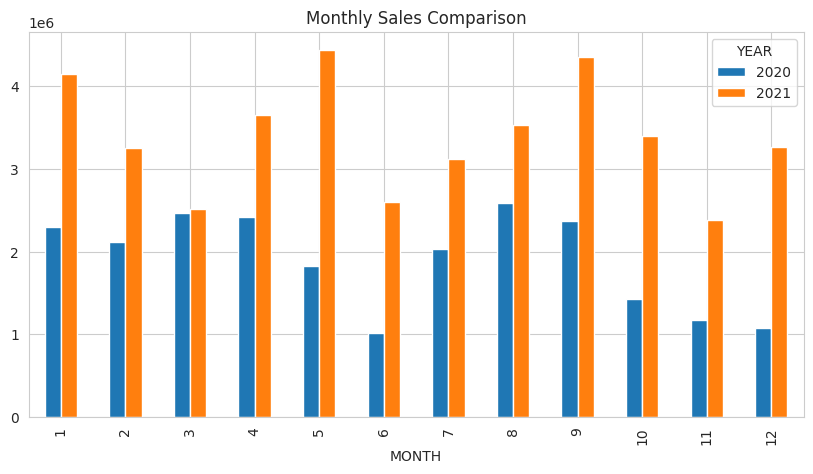

In [ ]:
monthly_sales = (
    consolidated_df.groupby(['YEAR', 'MONTH'])['SALES']
    .sum()
    .reset_index()
    .pivot(index='MONTH', columns='YEAR', values='SALES')
)
monthly_sales.plot(kind='bar', figsize=(10, 5), title='Monthly Sales Comparison')

## Retailer Performance
Goal: Identify high-performing retailers and those with growth potential.This helps to see


*  Top 5 retailers by revenue
*  Retailers with high unit volume but low revenue(pricing strategy)



In [ ]:
retailer_summary = (
    consolidated_df.groupby('RETAILER')[['SALES', 'UNITS_SOLD']]
    .sum()
    .sort_values(by='SALES', ascending=False)
)

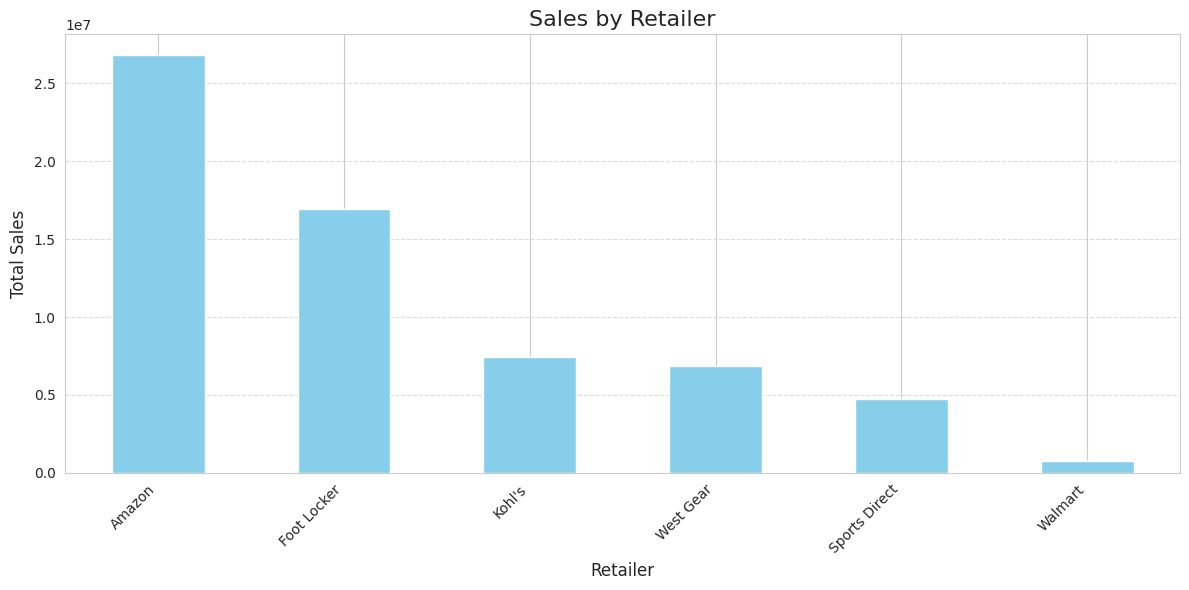

In [ ]:

# Plotting top retailers by sales
plt.figure(figsize=(12, 6))
retailer_summary['SALES'].plot(kind='bar', color='skyblue')
plt.title('Sales by Retailer', fontsize=16)
plt.xlabel('Retailer', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Geographic Insights
Goal: Understand regional demand and tailor strategies by state.This will help to


*   States with strong sales(expand presence)
*   Underperforming states(investigate barriers)



<Axes: title={'center': 'Sales by State'}, ylabel='STATE'>

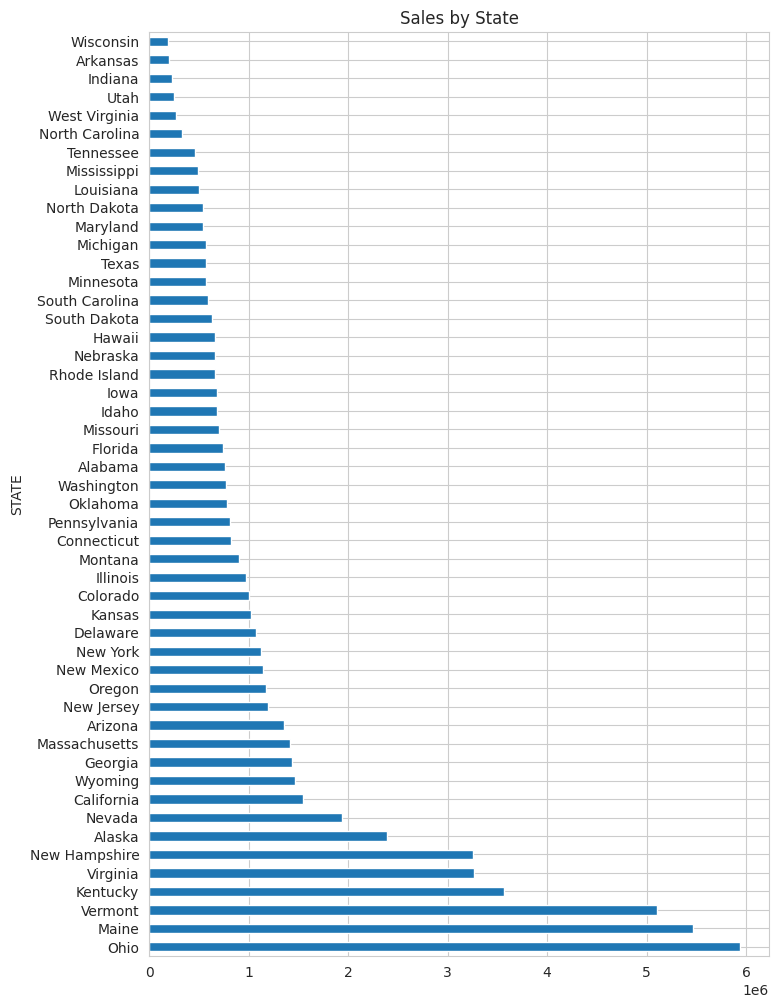

In [ ]:
state_sales = (
    consolidated_df.groupby('STATE')['SALES']
    .sum()
    .sort_values(ascending=False)
)
state_sales.plot(kind='barh', figsize=(8, 12), title='Sales by State')

## Sales Method Effectiveness
Goal: Compare Online vs Offline channels.This helps to find


*   Dominant channel
*   Opportunities to grow underused methods



<Axes: title={'center': 'Sales by Method'}, ylabel='SALES'>

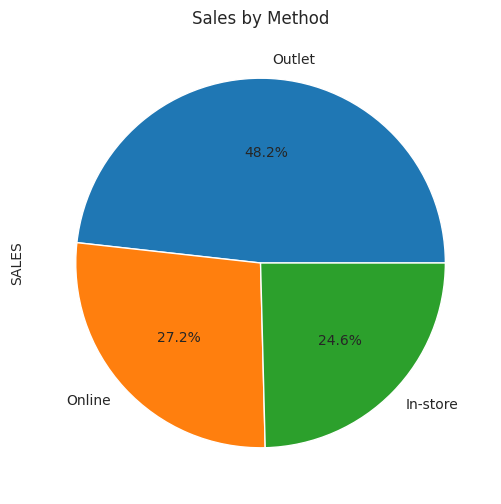

In [ ]:
sales_method_summary = (
    consolidated_df.groupby('SALES_METHOD')['SALES']
    .sum()
    .sort_values(ascending=False)
)
sales_method_summary.plot(kind='pie', autopct='%1.1f%%', title='Sales by Method')

## Product Trends
Goal: Identify best sellers and underperformers.This helps to find


*   Products with consistent growth
*   Categories with seasonal spikes



<Axes: title={'center': 'Top 10 Products by Sales'}, ylabel='PRODUCT_NAME'>

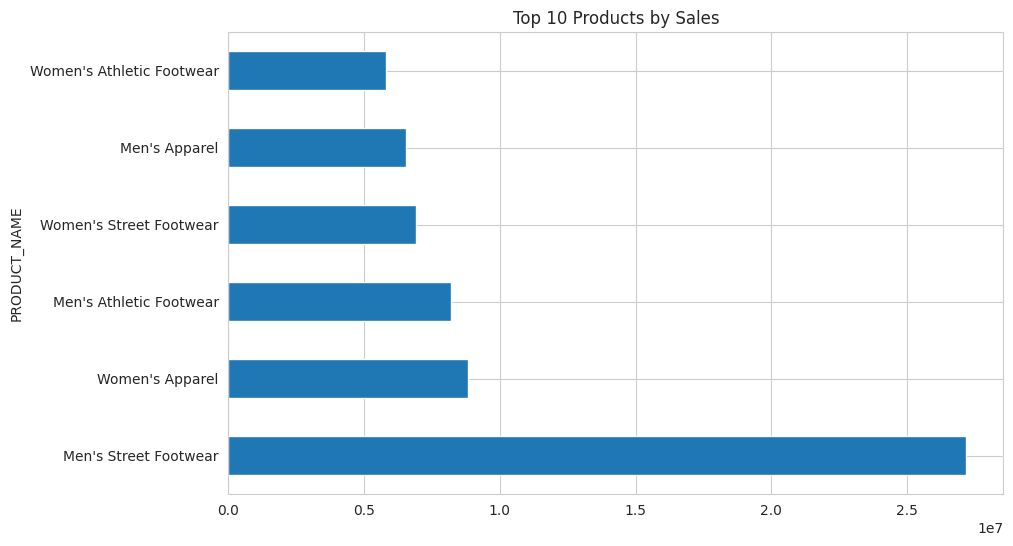

In [ ]:
product_sales = (
    consolidated_df.groupby('PRODUCT_NAME')['SALES']
    .sum()
    .sort_values(ascending=False)
)
product_sales.head(10).plot(kind='barh', title='Top 10 Products by Sales')

## Correlation Matrix
Insight: This one spot strong relationship like relationship between UNITS_SOLD and SALES and others.

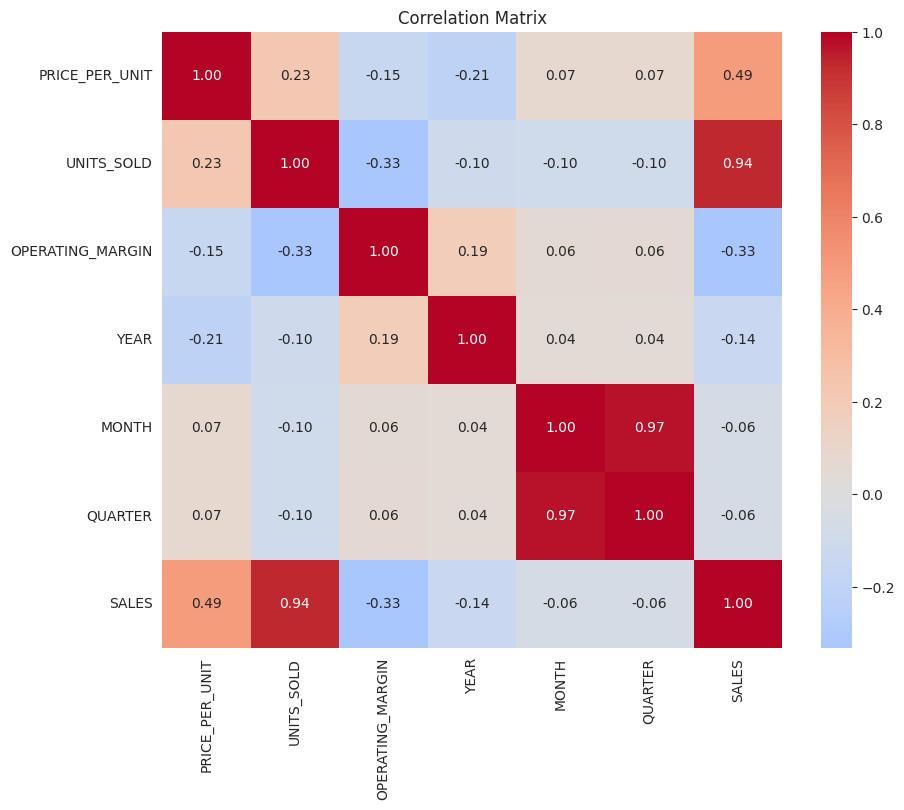

In [ ]:
import seaborn as sns

corr_matrix = consolidated_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Scatter Plot for Key Drivers
Insights: This one see how pricing affects sales across categories

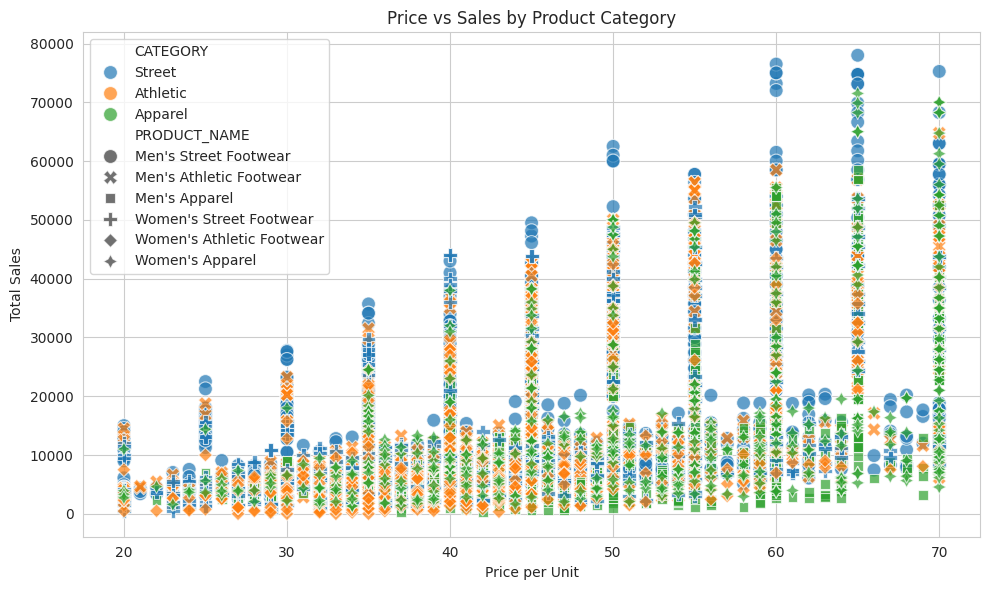

In [ ]:

# Optional: Create a simplified category from PRODUCT_NAME
consolidated_df['CATEGORY'] = consolidated_df['PRODUCT_NAME'].apply(lambda x: x.split()[1] if isinstance(x, str) else 'Unknown')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=consolidated_df,
    x='PRICE_PER_UNIT',
    y='SALES',
    hue='CATEGORY',
    style='PRODUCT_NAME',
    s=100,
    alpha=0.7
)
plt.title('Price vs Sales by Product Category')
plt.xlabel('Price per Unit')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

## Bubble Size by Margin

<Axes: xlabel='PRICE_PER_UNIT', ylabel='SALES'>

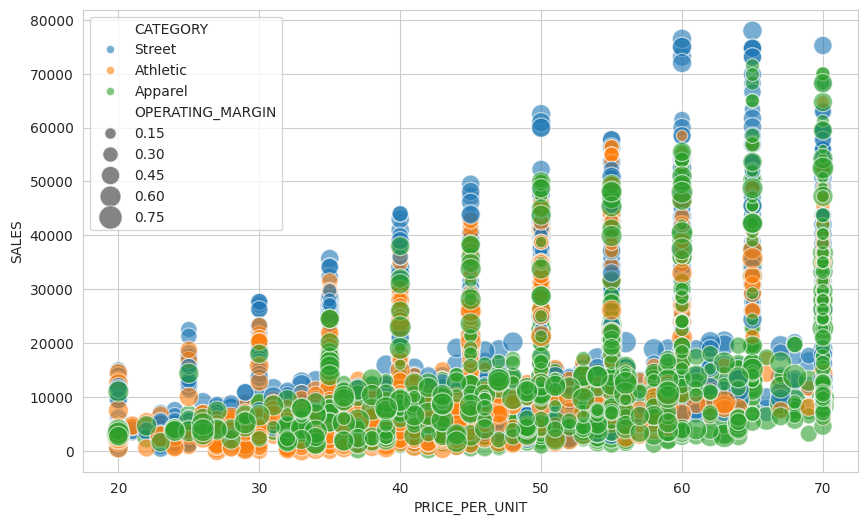

In [ ]:
sns.scatterplot(
    data=consolidated_df,
    x='PRICE_PER_UNIT',
    y='SALES',
    hue='CATEGORY',
    size='OPERATING_MARGIN',
    sizes=(50, 300),
    alpha=0.6
)


## Facet by Sales Method

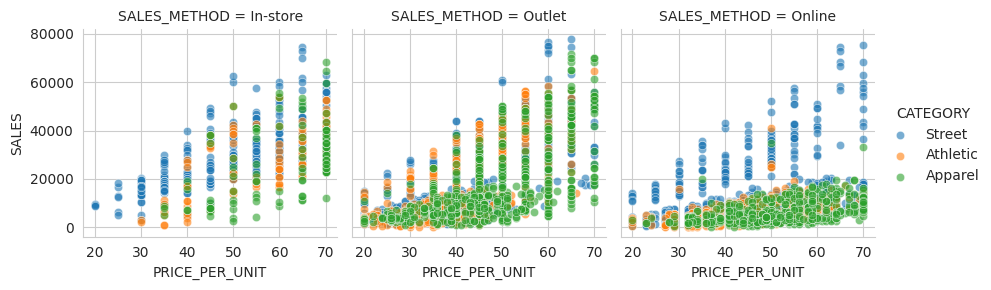

In [ ]:
g = sns.FacetGrid(consolidated_df, col='SALES_METHOD', hue='CATEGORY')
g.map(sns.scatterplot, 'PRICE_PER_UNIT', 'SALES', alpha=0.6)
g.add_legend()

## Answering VP's Questions

## Top-Selling Product in 2021

In [ ]:
top_product_2021 = (
    consolidated_df[consolidated_df['YEAR'] == 2021]
    .groupby('PRODUCT_NAME')['SALES']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)
print(top_product_2021)

PRODUCT_NAME
Men's Street Footwear   22450681.00
Name: SALES, dtype: float64


## State with Highest Sales of Women's Products in 2021

In [ ]:
top_state_women_2021 = (
    consolidated_df[
        (consolidated_df['YEAR'] == 2021) &
        (consolidated_df['PRODUCT_NAME'].str.contains("Women", case=False))
    ]
    .groupby('STATE')['SALES']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)
print(top_state_women_2021)

STATE
Maine   2139500.00
Name: SALES, dtype: float64


## State with Highest Sales of Men's Products in 2021

In [ ]:
top_state_men_2021 = (
    consolidated_df[
        (consolidated_df['YEAR'] == 2021) &
        (consolidated_df['PRODUCT_NAME'].str.contains("Men", case=False))
    ]
    .groupby('STATE')['SALES']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)
print(top_state_men_2021)

STATE
Maine   4348034.00
Name: SALES, dtype: float64


## Retailer with Most Units Purchased in2021 and 2020

In [ ]:
top_retailer_units_2021 = (
    consolidated_df[consolidated_df['YEAR'] == 2021]
    .groupby('RETAILER')['UNITS_SOLD']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)
print(top_retailer_units_2021)

top_retailer_units_2020 = (
    consolidated_df[consolidated_df['YEAR'] == 2020]
    .groupby('RETAILER')['UNITS_SOLD']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)
print(top_retailer_units_2020)

RETAILER
Foot Locker   365230.00
Name: UNITS_SOLD, dtype: float64
RETAILER
Amazon   302435.00
Name: UNITS_SOLD, dtype: float64
